# PROYECTO FINAL Data Science I - Izquierdo, Erika
## Temática: **Estadísticas Delictuales en Chile desde 2010 a 2023**

### Introducción:
Este trabajo plantea el análisis y evolución sobre diferentes delitos a lo largo de una década en el vecino país de Chile, en el mismo se incluye información sobre:
- Homicidios
- Robos/hurtos
- Violencia Familiar (Sobre niños, mujeres, hombres y adultos mayores)

### Hipótesis planteadas:
- Se cree que los indices de violencia familiar a los largo de estos 10 años deberian ir en descenso por la concientización y educación social al respecto.
- Además se cree que el género podría influir en las estadisticas de violencia, siendo el femenino mas propenso a ser victima de ello.
- Se estima que la tasa de homicidios pudo haberse incrementado al igual que la de Robos/hurtos por las crisis economicosociales de los últimos años.

### Objetivos:
En la primer parte de este trabajo se intentarán validar las hipótesis planteadas en el punto anterior, a traves de visualizaciones en diferentes gráficos que nos permiten ver de manera sencilla el comportamiento delictual a lo largo de la última década.

El objetivo final es intentar predecir, a traves de estos datos históricos, la ola de delitos a la que podría enfrentarse la fuerza policial, determinando de esta manera la necesidad y/o urgencia sobre reforzar dotaciones, generar nuevas vacantes para ingresos y/o ajustar políticas de contingencia. Para ello tomaremos como referencia los valores de Robo y Violencia sobre la mujer por tratarse de los mas representativos a nivel social.


### Primeras Observaciones:
De acuerdo a las primeras visualizaciones logradas, podemos observar una notable diferencia entre casos de violencia sobre mujeres, con respecto a hombre, ancianos y niños, además de una fuerte desaceleración de casos desde 2010 a la fecha.
Sobre Robos y hurtos, a primera vista se observa una baja en la cantidad de denuncias, por el contrario a Homicidios que tuvo su pico mas alto dentro del registro de los ultimos años.

- Para el Análisis predictivo de este dataset se trabajará con Algoritmos de Aprendizaje Supervisado, particularmente de **Regresión**.
- Para el modelado de los mismos se tomarán como referencia los valores de Robo y Violencia sobre la mujer por tratarse de los mas representativos a nivel social.














### Importo Librerías

In [127]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor



### **DATASET**

#### Descripción, detalle y visualizaciones.

In [144]:
# Importo el df

df_delitos= pd.read_excel ("estadisticas.delitos.xlsx")
print (df_delitos.head())

    AÑO      MES  Homicidios  Hurtos  Lesiones  Robos  Robo vehículo   \
0  2010    ENERO          28    9142      6723   4114            2270   
1  2010  FEBRERO          19    8083      5433   3568            2210   
2  2010    MARZO          18    7783      6527   3447            2375   
3  2010    ABRIL          15    8432      6248   3587            2480   
4  2010     MAYO          14    9121      6189   3844            2632   

   Delitos sexuales  Violencia s/adulto mayor  Violencia s/ hombres  \
0               657                       136                  1422   
1               593                       116                  1131   
2               716                       140                  1283   
3               710                       124                  1095   
4               707                       123                  1107   

   Violencia s/mujer  Violencia s/niños  
0               8618                468  
1               7020                373  
2       

In [7]:
# Dimensiones del df

df_delitos.shape

(162, 12)

In [30]:
# Columnas del df

df_delitos.columns

Index(['AÑO', 'MES', 'Homicidios', 'Hurtos', 'Lesiones', 'Robos',
       'Robo vehículo ', 'Delitos sexuales', 'Violencia s/adulto mayor',
       'Violencia s/ hombres', 'Violencia s/mujer', 'Violencia s/niños'],
      dtype='object')

In [11]:
# Información 

df_delitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   AÑO                       162 non-null    int64 
 1   MES                       162 non-null    object
 2   Homicidios                162 non-null    int64 
 3   Hurtos                    162 non-null    int64 
 4   Lesiones                  162 non-null    int64 
 5   Robos                     162 non-null    int64 
 6   Robo vehículo             162 non-null    int64 
 7   Delitos sexuales          162 non-null    int64 
 8   Violencia s/adulto mayor  162 non-null    int64 
 9   Violencia s/ hombres      162 non-null    int64 
 10  Violencia s/mujer         162 non-null    int64 
 11  Violencia s/niños         162 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 15.3+ KB


In [13]:
# Descripción del df

df_delitos.describe ().round (1)

,AÑO,Homicidios,Hurtos,Lesiones,Robos,Robo vehículo,Delitos sexuales,Violencia s/adulto mayor,Violencia s/ hombres,Violencia s/mujer,Violencia s/niños
count,162.0,162.0,162.0,162.0,162.0,162.0,162.0,162.0,162.0,162.0,162.0
mean,2016.1,29.3,8339.3,4272.4,4986.5,2357.3,920.9,207.4,1275.4,6769.3,344.4
std,4.1,13.4,1724.2,1159.3,994.8,379.9,266.0,72.8,216.1,1013.1,95.2
min,2010.0,10.0,3636.0,1965.0,2842.0,1264.0,511.0,97.0,882.0,4640.0,121.0
25%,2013.0,20.0,7878.5,3495.8,4232.2,2157.2,736.2,157.0,1132.2,5946.0,267.2
50%,2016.0,26.0,8861.5,4062.5,4924.0,2446.5,843.0,179.0,1241.0,6708.0,355.0
75%,2020.0,35.0,9517.8,4959.2,5653.0,2629.2,1044.8,234.2,1364.8,7317.8,414.8
max,2023.0,73.0,10738.0,7101.0,8196.0,3037.0,1763.0,418.0,1975.0,9388.0,541.0




### Detección de datos nulos en el dataset



In [164]:

print(df_delitos.isnull(). sum())

AÑO                         0
MES                         0
Homicidios                  0
Hurtos                      0
Lesiones                    0
Robos                       0
Robo vehículo               0
Delitos sexuales            0
Violencia s/adulto mayor    0
Violencia s/ hombres        0
Violencia s/mujer           0
Violencia s/niños           0
dtype: int64


##### No se visualizan datos nulos en el dataset seleccionado

### Visualización del dataset a través de diferentes gráficas que nos ayuden a comprenderlo

In [18]:
# Nuevo df para grafica de homicidios 

df_homicidios= df_delitos [["Homicidios","AÑO"]].groupby (by=["AÑO"]).sum().reset_index ()
print (df_homicidios.head())


    AÑO  Homicidios
0  2010         474
1  2011         195
2  2013         224
3  2014         302
4  2015         307


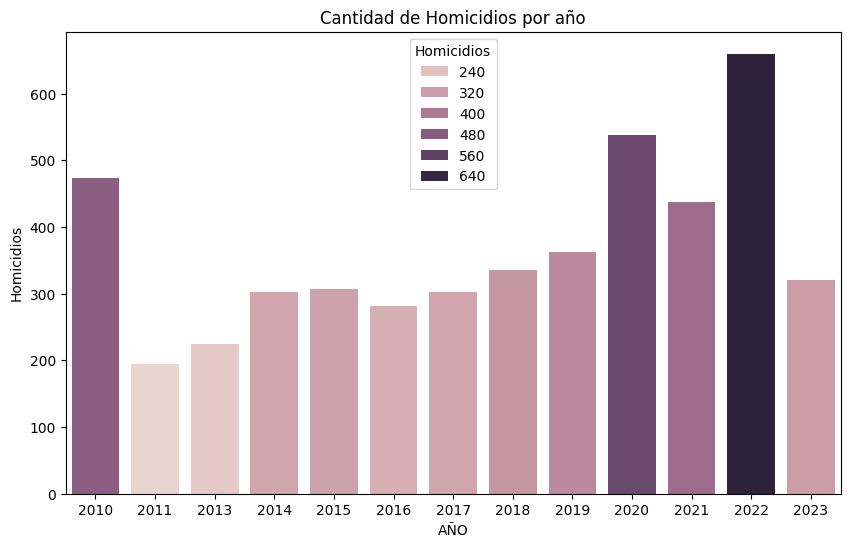

In [20]:
# Gráfico del nuevo df_homicidios

plt.figure(figsize=(10,6))
sns.color_palette("Set2")
sns.barplot (x="AÑO", y= "Homicidios", hue= "Homicidios", data= df_homicidios)
plt.title ("Cantidad de Homicidios por año")
plt.show ()



In [16]:
# Establezco un nuevo DF para comparar la violencia en distintos ambitos familiares

df_violencia= df_delitos [["Violencia s/adulto mayor","Violencia s/ hombres", "Violencia s/mujer","Violencia s/niños","AÑO"]].groupby (by=["AÑO"]).sum().reset_index ()
print (df_violencia.head())

    AÑO  Violencia s/adulto mayor  Violencia s/ hombres  Violencia s/mujer  \
0  2010                      3641                 31059             183641   
1  2011                      2047                 15759              89249   
2  2013                      1936                 15367              87203   
3  2014                      1949                 14914              81866   
4  2015                      2030                 13924              75391   

   Violencia s/niños  
0              11045  
1               5212  
2               4842  
3               4504  
4               4453  


In [17]:
# Armo un nuevo DF para poder visualizar la información sobre violencia en un solo gráfico de líneas

df_violencia2 = df_violencia.melt (id_vars= "AÑO", var_name="Grupo", value_name= "Violencia")
print (df_violencia2.head())

    AÑO                     Grupo  Violencia
0  2010  Violencia s/adulto mayor       3641
1  2011  Violencia s/adulto mayor       2047
2  2013  Violencia s/adulto mayor       1936
3  2014  Violencia s/adulto mayor       1949
4  2015  Violencia s/adulto mayor       2030


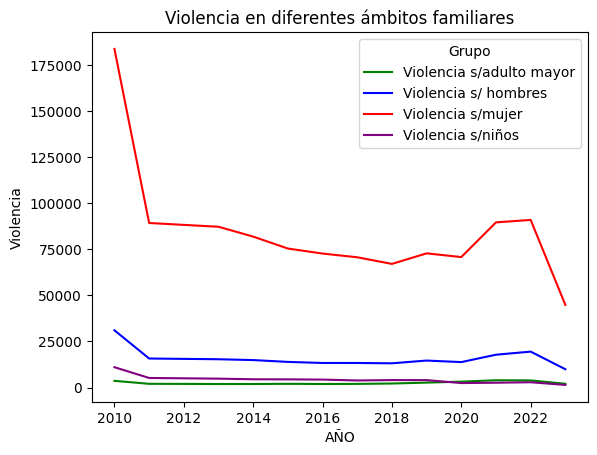

In [23]:
#Realizo el gráfico de líneas con el nuevo df_violencia2

sns.lineplot (data= df_violencia2, x= "AÑO", y="Violencia", hue= "Grupo", palette= ["green", "blue","red", "purple"])
plt.title ("Violencia en diferentes ámbitos familiares")
plt.show()

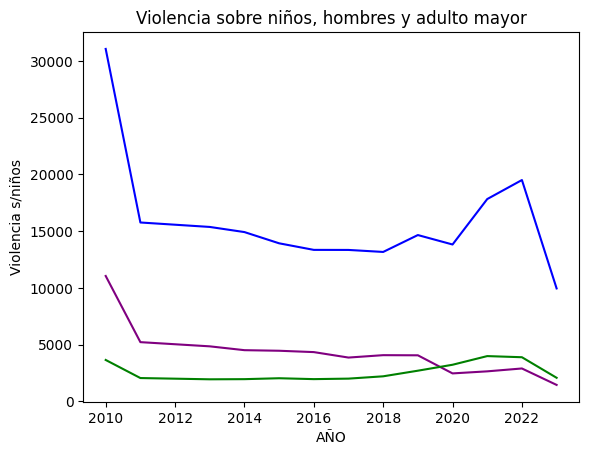

In [25]:
# Grafico nuevamente quitando información sobre mujeres para poder visualizar mejor el resto de las variables.

sns.lineplot(data= df_violencia, x="AÑO", y="Violencia s/niños", color= "purple")
sns.lineplot (data= df_violencia, x="AÑO", y="Violencia s/ hombres", color= "blue")
sns.lineplot (data= df_violencia, x="AÑO", y="Violencia s/adulto mayor", color= "green")
plt.title ("Violencia sobre niños, hombres y adulto mayor")
plt.show()

In [27]:
# Establezco un nuevo df para robos

df_robos= df_delitos [["Robos","Hurtos","AÑO"]].groupby (by=["AÑO"]).sum().reset_index ()
print (df_robos.head())

    AÑO   Robos  Hurtos
0  2010  103205  228862
1  2011   48134  114723
2  2013   52027  115631
3  2014   59572  117372
4  2015   61264  111989


In [28]:
#Agrupo valores para poder realizar gráfico de barras

df_robos2 = df_robos.melt (id_vars= "AÑO", var_name="Grupo", value_name= "Robos/Hurtos")
print (df_robos2.head())

    AÑO  Grupo  Robos/Hurtos
0  2010  Robos        103205
1  2011  Robos         48134
2  2013  Robos         52027
3  2014  Robos         59572
4  2015  Robos         61264


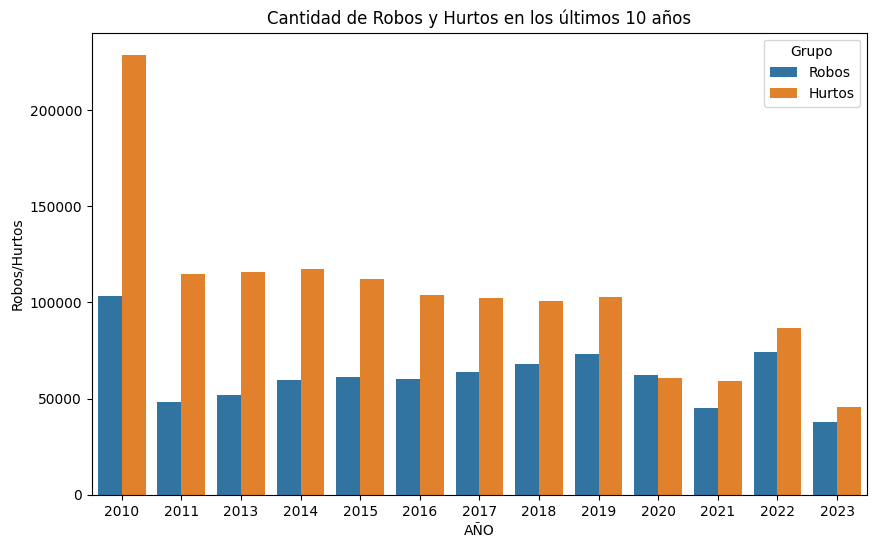

In [29]:
#Realizo visualización sobre la iunformación de Robos y Hurtos

plt.figure(figsize=(10,6))
sns.color_palette("hls",8)
sns.barplot (x="AÑO", y= "Robos/Hurtos", hue= "Grupo", data= df_robos2)
plt.title ("Cantidad de Robos y Hurtos en los últimos 10 años")
plt.show()

Text(0.5, 0, 'Años')

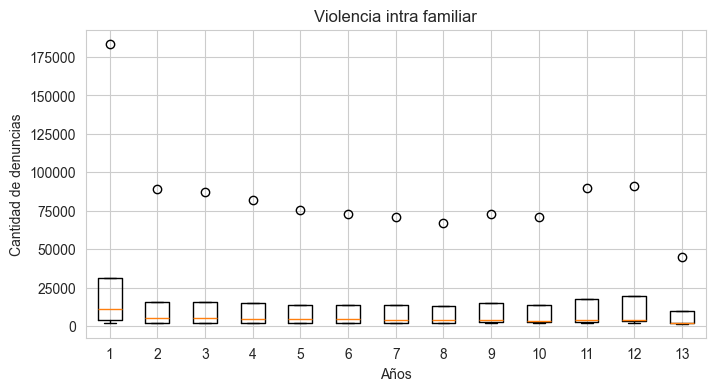

In [250]:
# Identifico Outliers en df sobre violencia familiar

fig, ax = plt.subplots (figsize=(8,4))
ax.boxplot(df_violencia.T)
ax.set_title ("Violencia intra familiar")
ax.set_ylabel ("Cantidad de denuncias")
ax.set_xlabel ("Años")



## Preprocesamiento de datos

In [189]:
# Clasificación de variables categóricas - Label Encoder

column= ["MES", "AÑO"]

df_delitos [column] = df_delitos [column].apply (LabelEncoder().fit_transform)
df_delitos.head()

,AÑO,MES,Homicidios,Hurtos,Lesiones,Robos,Robo vehículo,Delitos sexuales,Violencia s/adulto mayor,Violencia s/ hombres,Violencia s/mujer,Violencia s/niños
0,0,3,28,9142,6723,4114,2270,657,136,1422,8618,468
1,0,4,19,8083,5433,3568,2210,593,116,1131,7020,373
2,0,7,18,7783,6527,3447,2375,716,140,1283,7552,482
3,0,0,15,8432,6248,3587,2480,710,124,1095,6778,405
4,0,8,14,9121,6189,3844,2632,707,123,1107,6955,452


## Modelado 1 - Robos

In [190]:
# Se cargan los datos

X = df_delitos.drop(["Robos"], axis=1)
y = df_delitos ["Robos"]

In [191]:
# Se separan los datos para entrenamiento y testeo

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = 0.20, random_state= 16)

#### **Modelo Regresión Lineal**

In [192]:
model_rl = LinearRegression ()
model_rl.fit (X_train, y_train)
y_pred_rl = model_rl.predict (X_test)

r2_rl = r2_score (y_test, y_pred_rl)
print ("El r2 de la regresión lineal es", r2_rl)

MAE_rl= mean_absolute_error(y_test,y_pred_rl)
print("El MAE de la regresión lineal es",MAE_rl)

RMSE_rl = mean_squared_error(y_test,y_pred_rl)
print("El RMSE de la regresión lineal es",np.sqrt(RMSE_rl))

El r2 de la regresión lineal es 0.7363453086126093
El MAE de la regresión lineal es 351.02799379117255
El RMSE de la regresión lineal es 464.72150965368525


#### **Modelo KKN**

In [193]:
model = KNN (n_neighbors=5)
model.fit(X_train,y_train)

y_pred = model.predict (X_test)

r2_knn = r2_score (y_test, y_pred)
print ("El r2 de knn es", r2_knn)

MAE_knn= mean_absolute_error(y_test,y_pred)
print("El MAE de knn es",MAE_knn)

RMSE_knn = mean_squared_error(y_test,y_pred)
print("El RMSE de knn es",np.sqrt(RMSE_knn))

El r2 de knn es 0.7824530603420875
El MAE de knn es 331.6060606060607
El RMSE de knn es 422.1351456727113


#### **Modelo XGBoost**

In [167]:
model = XGBRegressor(n_estimators=2000, max_depth=7, learning_rate= 0.01)

model.fit (X_train, y_train)

y_pred = model.predict (X_test)
r2_xgb = r2_score (y_test, y_pred)
print ("El r2 de XGB es", r2_xgb)

MAE_xgb= mean_absolute_error(y_test,y_pred)
print("El MAE de xgb es",MAE_xgb)

RMSE_xgb = mean_squared_error(y_test,y_pred)
print("El RMSE de xgb es",np.sqrt(RMSE_xgb))

El r2 de XGB es 0.753105878829956
El MAE de xgb es 305.05175041429925
El RMSE de xgb es 449.70774889527


### Resultados en Test - Modelado 1

#### Métricas R2

In [154]:
print("Algoritmo Regresión Lineal " + str(round(r2_rl, 4)))
print("Algoritmo KNN " + str(round(r2_knn, 4)))
print("Algoritmo XGB " + str(round(r2_xgb, 4)))

Algoritmo Regresión Lineal 0.7363
Algoritmo KNN 0.7825
Algoritmo XGB 0.7531


#### Conclusión de test - Modelado 1

El mejor modelo para Robos fue el KNN.

## Modelado 2 - Violencia sobre Mujeres

In [194]:
# Se cargan los datos

X = df_delitos.drop(["Violencia s/mujer"], axis=1)
y = df_delitos ["Violencia s/mujer"]

In [195]:
# Se separan los datos para entrenamiento y testeo

X_train, X_test, y_train, y_test = train_test_split (X,y,test_size = 0.20, random_state= 16)

#### **Modelo Regresión Lineal**

In [196]:
model_rl = LinearRegression ()
model_rl.fit (X_train, y_train)
y_pred_rl = model_rl.predict (X_test)

r2_rl = r2_score (y_test, y_pred_rl)
print ("El r2 de la regresión lineal es", r2_rl)

MAE_rl= mean_absolute_error(y_test,y_pred_rl)
print("El MAE de la regresión lineal es",MAE_rl)

RMSE_rl = mean_squared_error(y_test,y_pred_rl)
print("El RMSE de la regresión lineal es",np.sqrt(RMSE_rl))

El r2 de la regresión lineal es 0.9191991299190647
El MAE de la regresión lineal es 193.68206375983203
El RMSE de la regresión lineal es 230.8936249836121


#### **Modelo KNN**

In [197]:
model = KNN (n_neighbors=5)
model.fit(X_train,y_train)

y_pred = model.predict (X_test)

r2_knn = r2_score (y_test, y_pred)
print ("El r2 de knn es", r2_knn)

MAE_knn= mean_absolute_error(y_test,y_pred)
print("El MAE de knn es",MAE_knn)

RMSE_knn = mean_squared_error(y_test,y_pred)
print("El RMSE de knn es",np.sqrt(RMSE_knn))

El r2 de knn es 0.5313863776787767
El MAE de knn es 419.6363636363635
El RMSE de knn es 556.0468412795542


#### **Modelo XGBoost**

In [198]:
model = XGBRegressor(n_estimators=2000, max_depth=7, learning_rate= 0.01)

model.fit (X_train, y_train)

y_pred = model.predict (X_test)
r2_xgb = r2_score (y_test, y_pred)
print ("El r2 de XGB es", r2_xgb)

MAE_xgb= mean_absolute_error(y_test,y_pred)
print("El MAE de xgb es",MAE_xgb)

RMSE_xgb = mean_squared_error(y_test,y_pred)
print("El RMSE de xgb es",np.sqrt(RMSE_xgb))

El r2 de XGB es 0.8855772018432617
El MAE de xgb es 228.2778172348485
El RMSE de xgb es 274.76422492880033


### Resultados en Test - Modelado 2

#### Métricas R2

In [199]:
print("Algoritmo Regresión Lineal " + str(round(r2_rl, 4)))
print("Algoritmo KNN " + str(round(r2_knn, 4)))
print("Algoritmo XGB " + str(round(r2_xgb, 4)))

Algoritmo Regresión Lineal 0.9192
Algoritmo KNN 0.5314
Algoritmo XGB 0.8856


#### Conclusiones en Test - Modelado 2

El mejor modelo para Robos fue el Regresión Lineal.

## **Conclusiones del trabajo**

Se generaron los modelos predictivos tanto para Robos como para Violencia sobre mujer, vemos que los resultados del algoritmo del segundo modelado son significativamente mejores que el primero.
Si bien el primer modelado es poco probable que sirva ya que los resultados no alcanzan a ser buenos, hay posibilidades de poder utilizar el segundo modelado para la predicción requerida.